# Support Vector Regression
SVR is an application of the Support Vector Machine to a regression problem. 

A good explanation is: http://mcminis1.github.io/blog/2014/05/10/intuition-for-SVR/


Predicting a new value at 2: [ 32056.64461279]
Predicting a new value at 3: [ 38025.43775708]
Regression Score: 0.9516494078786082


/home/isluttmt/anaconda3/envs/datacamp/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/isluttmt/anaconda3/envs/datacamp/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


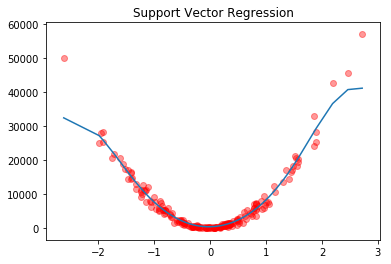

In [5]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

#generate random data
X,y = datasets.make_regression( n_samples=200, n_features=1, noise=7, bias=2, random_state=42)
y = y**2
y = y.reshape(-1, 1)

#Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#Create and fit the SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

#Predict some new values, need to scale the X, then unscale the resulting prediction. 
print("Predicting a new value at 2: {}".format(  sc_y.inverse_transform(regressor.predict(sc_X.transform( np.array([[2]]  ))))))
print("Predicting a new value at 3: {}".format(  sc_y.inverse_transform(regressor.predict(sc_X.transform( np.array([[3]]  ))))))

print("Regression Score: {}".format(regressor.score(X, y)))

# Visualising SVR results
new_X, new_y = zip(*sorted(zip( sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X))))) # sort the values
plt.plot(new_X, new_y)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red', alpha=0.4)
plt.title('Support Vector Regression')
plt.show()